# Análisis de los resultados de Elliot

En este *notebook* analizaremos los resultados obtenidos mediante la librería `Elliot`. Para ello, incluimos gráficas de métricas referentes a las valoraciones (*ratings*) que se predicen en todo el dataset y, por otro lado, la precisión (*accuracy*) de las $k$ recomendaciones, junto con métricas de cobertura (*coverage*), diversidad (*diversity*) y novedad (*novelty*) de las mismas.

## KNN Baseline (User-Item)

Para este modelo, se han creado perfiles de usuario a partir de los libros valorados y después se han buscado los libros más similares a cada perfil de usuario. Por tanto, se trata de un sistema recomendador KNN basado en contenido.

In [1]:
import os

# Ruta de resultados de evaluación para el modelo KNN
eval_knn_path = os.path.join(os.getcwd(), "../..", "elliot", "results", "knn")

### Evaluación de las recomendaciones

Se han realizado varios experimentos teniendo en cuenta el *cutoff* de recomendaciones. A la hora de obtener las recomendaciones, se ajustó en $k = 50$, pero también se incluyen datos para $k \in \{5, 10, 25\}$ correspondientes al resto de valores de *cutoff*.

In [2]:
import pandas as pd

# Ruta de resultados de evaluación de recomendaciones del modelo KNN
rec_eval_knn_path = eval_knn_path + "/user-item/"

# Pesos dados a la parte semántica
weights = [100, 80, 60, 40, 20, 0]

# Cutoffs
cutoffs = [50, 25, 10, 5]

# Leer los ficheros de resultados y juntar en un único dataframe (por cada cutoff)
eval_df_dict = {}
for cutoff in cutoffs:
    eval_df = pd.DataFrame()
    for weight in weights:
        df = pd.read_csv(rec_eval_knn_path + "cutoff_" + str(cutoff) + "_" + str(weight) + ".tsv", sep="\t")
        eval_df = pd.concat([eval_df, df], ignore_index=True)
    eval_df["model"] = weights
    eval_df.rename(columns={"model": "sem_weight"}, inplace=True)
    eval_df_dict[cutoff] = eval_df.copy()

# Cada uno de los dataframes con los resultados de evaluación para un cutoff
for cutoff in eval_df_dict:
    print("Cutoff:", cutoff)
    display(eval_df_dict[cutoff])

Cutoff: 50


,sem_weight,nDCG,Precision,Recall,HR,MAP,MAR,MRR,ItemCoverage,EFD,EPC,Gini
0,100,0.020934,0.010029,0.024855,0.325733,0.013218,0.014660,0.059196,2056.0,0.152796,0.011684,0.026659
1,80,0.020657,0.009971,0.024612,0.330433,0.013195,0.014682,0.058869,1954.0,0.152184,0.011632,0.026890
2,60,0.019856,0.009693,0.023849,0.325633,0.012756,0.014258,0.056636,1892.0,0.146644,0.011225,0.026883
3,40,0.018398,0.009239,0.022618,0.318132,0.011622,0.013109,0.051483,1916.0,0.136316,0.010433,0.027869
4,20,0.014927,0.007775,0.019013,0.284628,0.009392,0.010762,0.040536,2004.0,0.110747,0.008498,0.028405
5,0,0.005124,0.003048,0.007305,0.139014,0.003191,0.003842,0.013371,2368.0,0.038871,0.003007,0.038477


Cutoff: 25


,sem_weight,nDCG,Precision,Recall,HR,MAP,MAR,MRR,ItemCoverage,EFD,EPC,Gini
0,100,0.015955,0.011917,0.014846,0.216522,0.015576,0.009054,0.056122,1467.0,0.178759,0.013652,0.017656
1,80,0.015990,0.012241,0.015235,0.226423,0.015446,0.009001,0.055960,1389.0,0.180350,0.013787,0.018152
2,60,0.015298,0.011893,0.014710,0.224422,0.014780,0.008613,0.053765,1325.0,0.173297,0.013264,0.018291
3,40,0.013829,0.010937,0.013411,0.209921,0.013226,0.007753,0.048444,1355.0,0.157445,0.012028,0.018552
4,20,0.010997,0.009069,0.011050,0.180518,0.010483,0.006239,0.037637,1439.0,0.125564,0.009640,0.018405
5,0,0.003452,0.003256,0.003880,0.077208,0.003282,0.002048,0.011694,1776.0,0.040829,0.003147,0.026369


Cutoff: 10


,sem_weight,nDCG,Precision,Recall,HR,MAP,MAR,MRR,ItemCoverage,EFD,EPC,Gini
0,100,0.015783,0.015672,0.007875,0.130613,0.018875,0.004873,0.050812,878.0,0.223601,0.017088,0.010037
1,80,0.015333,0.015332,0.007683,0.127813,0.018408,0.004683,0.049902,856.0,0.219285,0.016741,0.010557
2,60,0.014575,0.014661,0.007262,0.125113,0.017452,0.004401,0.047671,839.0,0.208349,0.015911,0.010936
3,40,0.012832,0.012831,0.006340,0.111411,0.015364,0.003859,0.042406,819.0,0.183236,0.013977,0.010672
4,20,0.009970,0.010501,0.005124,0.091609,0.011678,0.002972,0.032267,898.0,0.141955,0.010934,0.010971
5,0,0.002827,0.003440,0.001633,0.033703,0.003263,0.000889,0.009124,1192.0,0.041975,0.003228,0.016526


Cutoff: 5


,sem_weight,nDCG,Precision,Recall,HR,MAP,MAR,MRR,ItemCoverage,EFD,EPC,Gini
0,100,0.017515,0.018722,0.004774,0.084308,0.021206,0.003105,0.044816,602.0,0.256820,0.019631,0.006843
1,80,0.016603,0.017602,0.004411,0.079308,0.020610,0.002931,0.043501,578.0,0.246505,0.018808,0.006993
2,60,0.015877,0.016982,0.004205,0.077408,0.019520,0.002765,0.041449,576.0,0.235472,0.017960,0.007281
3,40,0.014055,0.014861,0.003690,0.068907,0.017255,0.002428,0.036867,589.0,0.207215,0.015789,0.007264
4,20,0.010326,0.011241,0.002743,0.052005,0.012581,0.001747,0.027113,603.0,0.151478,0.011665,0.007670
5,0,0.002709,0.003540,0.000835,0.017502,0.003020,0.000457,0.007002,833.0,0.041759,0.003203,0.011670


#### Precisión

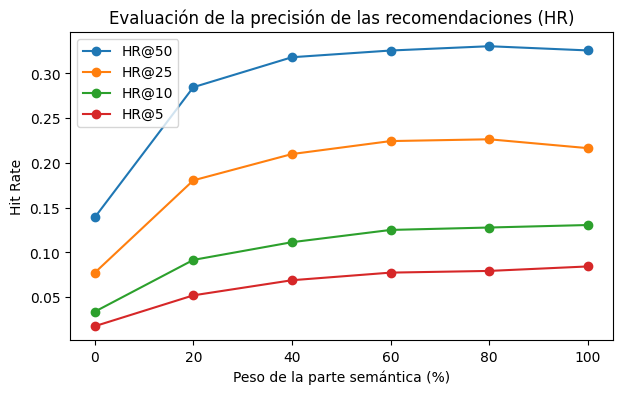

In [3]:
import matplotlib.pyplot as plt

# Gráfica de HR para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["HR"], "o-", label="HR@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Hit Rate")
ax.set_title("Evaluación de la precisión de las recomendaciones (HR)")
ax.legend()
plt.show()

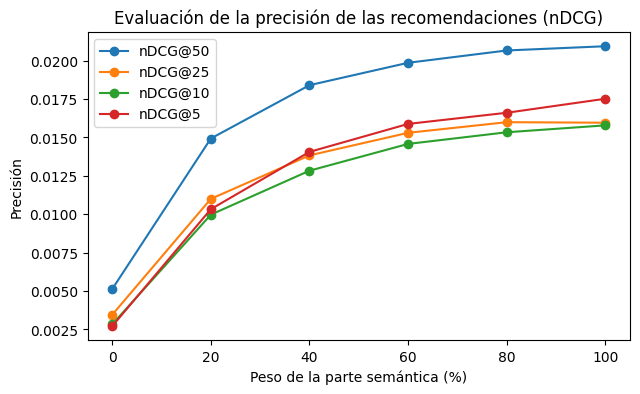

In [4]:
# Gráfica de nDCG para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["nDCG"], "o-", label="nDCG@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (nDCG)")
ax.legend()
plt.show()

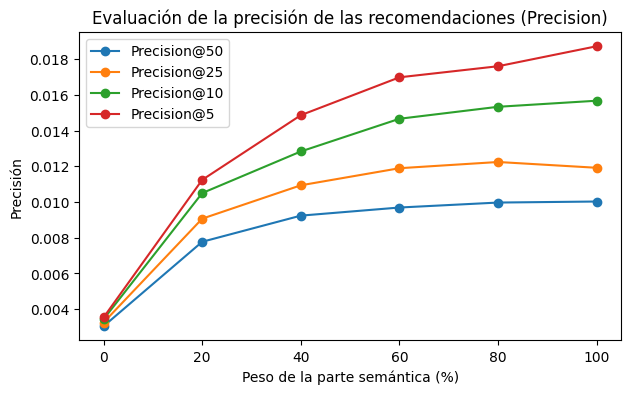

In [5]:
# Gráfica de Precision para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["Precision"], "o-", label="Precision@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (Precision)")
ax.legend()
plt.show()

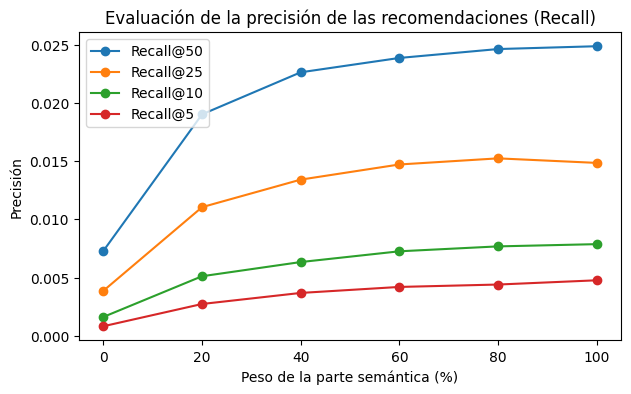

In [6]:
# Gráfica de Recall para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["Recall"], "o-", label="Recall@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (Recall)")
ax.legend()
plt.show()

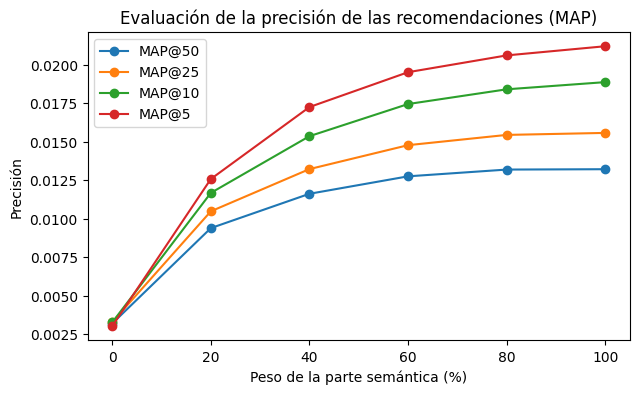

In [7]:
# Gráfica de MAP para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["MAP"], "o-", label="MAP@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (MAP)")
ax.legend()
plt.show()

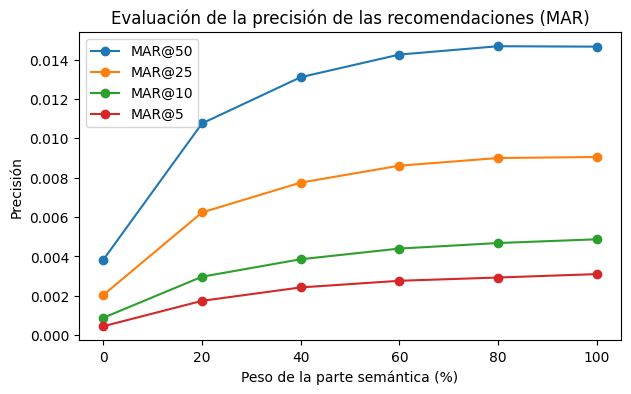

In [8]:
# Gráfica de MAR para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["MAR"], "o-", label="MAR@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (MAR)")
ax.legend()
plt.show()

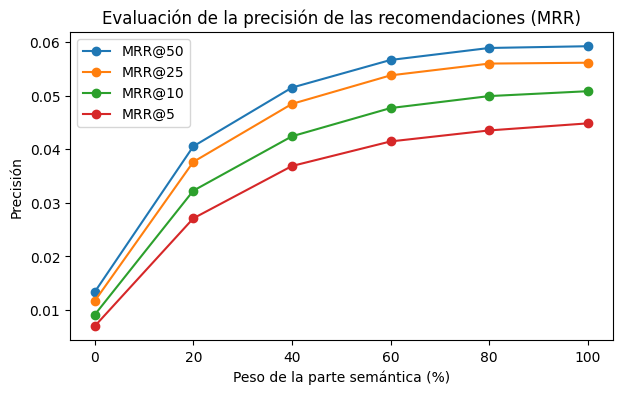

In [9]:
# Gráfica de MRR para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["MRR"], "o-", label="MRR@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (MRR)")
ax.legend()
plt.show()

<span style="color:red">Pendiente de analizar.</span>

#### Cobertura

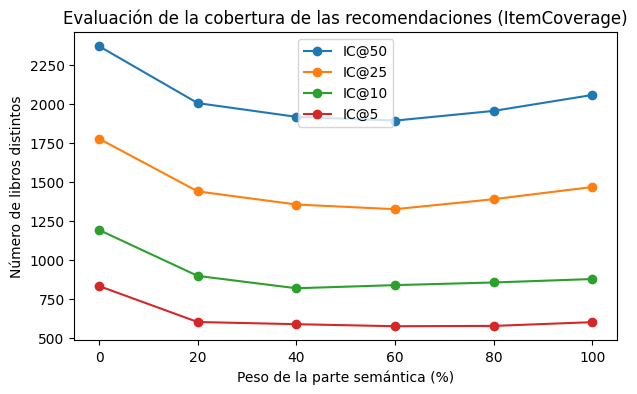

In [10]:
# Gráfica de ItemCoverage para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["ItemCoverage"], "o-", label="IC@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Número de libros distintos")
ax.set_title("Evaluación de la cobertura de las recomendaciones (ItemCoverage)")
ax.legend()
plt.show()

#### Novedad

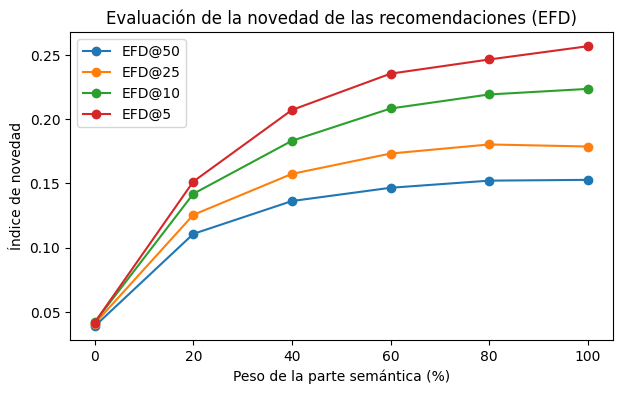

In [11]:
# Gráfica de EFD para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["EFD"], "o-", label="EFD@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Índice de novedad")
ax.set_title("Evaluación de la novedad de las recomendaciones (EFD)")
ax.legend()
plt.show()

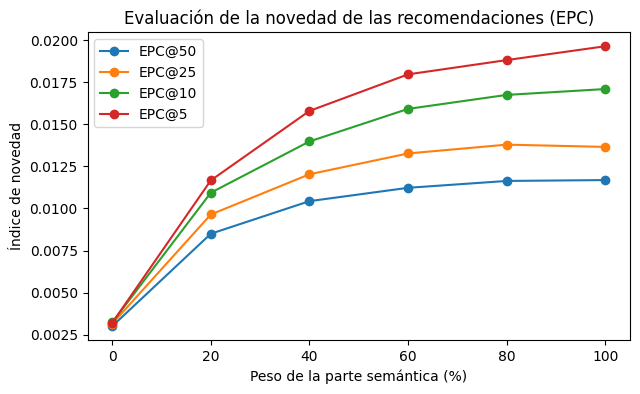

In [12]:
# Gráfica de EPC para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["EPC"], "o-", label="EPC@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Índice de novedad")
ax.set_title("Evaluación de la novedad de las recomendaciones (EPC)")
ax.legend()
plt.show()

#### Diversidad

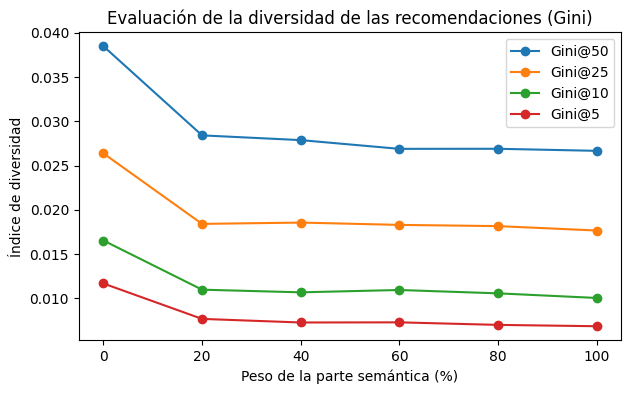

In [13]:
# Gráfica de Gini para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["Gini"], "o-", label="Gini@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Índice de diversidad")
ax.set_title("Evaluación de la diversidad de las recomendaciones (Gini)")
ax.legend()
plt.show()

## KNN Baseline (User-User)

En este caso, el modelo evaluado se trata de un KNN híbrido entre *content-based* y *collaborative filtering*. Por un lado, está basado en contenido ya que los perfiles de usuario se construyen sobre los *embeddings* semánticos y de *sentiment analysis* de los libros que han valorado. Además, incorpora filtrado colaborativo ya que a partir de los usuarios con perfiles más parecidos, se recomiendan libros que estos han valorado (de forma positiva) y que el usuario no habría leído.

### Evaluación de las recomendaciones

Para las recomendaciones se han tenido en cuenta los 15 perfiles de usuario más parecidos a cada uno de los usuarios del dataset de test. 

Se han realizado varios experimentos teniendo en cuenta el *cutoff* de recomendaciones. A la hora de obtener las recomendaciones, se ajustó en $k = 50$, pero también se incluyen datos para $k \in \{5, 10, 25\}$ correspondientes al resto de valores de *cutoff*. Asimismo, se ha ido variando la ponderación entre los vectores semántico y *sentiment* para pesos $w \in \{0.0, 0.2, 0.4, 0.6, 0.8, 1.0\}$.

In [14]:
# Ruta de resultados de evaluación de recomendaciones del modelo KNN
rec_eval_knn_path = eval_knn_path + "/user-user/"

# Pesos dados a la parte semántica
weights = [100, 80, 60, 40, 20, 0]

# Cutoffs
cutoffs = [50, 25, 10, 5]

# Leer los ficheros de resultados y juntar en un único dataframe (por cada cutoff)
eval_df_dict = {}
for cutoff in cutoffs:
    eval_df = pd.DataFrame()
    for weight in weights:
        df = pd.read_csv(rec_eval_knn_path + "cutoff_" + str(cutoff) + "_" + str(weight) + ".tsv", sep="\t")
        eval_df = pd.concat([eval_df, df], ignore_index=True)
    eval_df["model"] = weights
    eval_df.rename(columns={"model": "sem_weight"}, inplace=True)
    eval_df_dict[cutoff] = eval_df.copy()

# Cada uno de los dataframes con los resultados de evaluación para un cutoff
for cutoff in eval_df_dict:
    print("Cutoff:", cutoff)
    display(eval_df_dict[cutoff])

Cutoff: 50


,sem_weight,nDCG,Precision,Recall,HR,MAP,MAR,MRR,ItemCoverage,EFD,EPC,Gini
0,100,0.226860,0.096968,0.233073,0.961596,0.151263,0.152046,0.477562,6154.0,1.296943,0.111733,0.106042
1,80,0.226657,0.097000,0.233073,0.964396,0.151026,0.151923,0.477759,6116.0,1.295592,0.111632,0.105424
2,60,0.224426,0.096366,0.231718,0.964396,0.149615,0.150767,0.471609,6136.0,1.283254,0.110608,0.104914
3,40,0.219660,0.094455,0.227122,0.963096,0.146662,0.148143,0.463010,6122.0,1.254898,0.108231,0.104700
4,20,0.209759,0.091089,0.219058,0.958496,0.139815,0.141953,0.443851,6143.0,1.193941,0.103201,0.103905
5,0,0.140583,0.063500,0.151322,0.888489,0.093438,0.095641,0.323423,6480.0,0.769963,0.067916,0.099349


Cutoff: 25


,sem_weight,nDCG,Precision,Recall,HR,MAP,MAR,MRR,ItemCoverage,EFD,EPC,Gini
0,100,0.191937,0.133205,0.160924,0.908891,0.190975,0.103444,0.476005,4307.0,1.666624,0.144156,0.071650
1,80,0.191908,0.133405,0.161238,0.909591,0.190415,0.103139,0.476170,4321.0,1.665636,0.144085,0.071631
2,60,0.189310,0.131709,0.159140,0.908391,0.188348,0.102007,0.469965,4302.0,1.642999,0.142193,0.071198
3,40,0.185638,0.129473,0.156860,0.906391,0.184599,0.100449,0.461335,4315.0,1.609493,0.139332,0.070605
4,20,0.176339,0.124172,0.149990,0.898090,0.175027,0.095462,0.442083,4274.0,1.523235,0.132167,0.069450
5,0,0.115568,0.083932,0.100507,0.787379,0.114879,0.062615,0.320483,4201.0,0.955945,0.084699,0.058642


Cutoff: 10


,sem_weight,nDCG,Precision,Recall,HR,MAP,MAR,MRR,ItemCoverage,EFD,EPC,Gini
0,100,0.205905,0.192059,0.093752,0.779578,0.244336,0.060073,0.467477,2696.0,2.186229,0.189722,0.046145
1,80,0.204930,0.190859,0.093106,0.781478,0.243452,0.059695,0.467720,2713.0,2.176816,0.188861,0.046188
2,60,0.202878,0.189759,0.092624,0.778178,0.240846,0.059180,0.461494,2695.0,2.156346,0.187093,0.045940
3,40,0.198389,0.186099,0.090903,0.775378,0.235317,0.057971,0.452813,2657.0,2.106531,0.182893,0.045125
4,20,0.187095,0.176178,0.085973,0.758476,0.221561,0.054563,0.432969,2641.0,1.973502,0.171772,0.043324
5,0,0.120391,0.115402,0.055686,0.609561,0.144035,0.035152,0.309079,2260.0,1.207267,0.107288,0.030793


Cutoff: 5


,sem_weight,nDCG,Precision,Recall,HR,MAP,MAR,MRR,ItemCoverage,EFD,EPC,Gini
0,100,0.236679,0.239984,0.059088,0.652165,0.280510,0.039433,0.450205,1905.0,2.558240,0.222388,0.034859
1,80,0.235719,0.239064,0.058786,0.652565,0.279809,0.039286,0.450517,1871.0,2.551495,0.221743,0.034526
2,60,0.232776,0.236724,0.058289,0.647865,0.276366,0.038797,0.443968,1883.0,2.519594,0.219027,0.034585
3,40,0.226777,0.230923,0.056809,0.637964,0.269220,0.037824,0.434312,1856.0,2.454581,0.213430,0.033895
4,20,0.213073,0.217122,0.053308,0.616762,0.252809,0.035437,0.413936,1882.0,2.287139,0.199377,0.032261
5,0,0.136728,0.142014,0.034472,0.466247,0.163845,0.022712,0.289932,1449.0,1.393720,0.123965,0.020555


#### Precisión

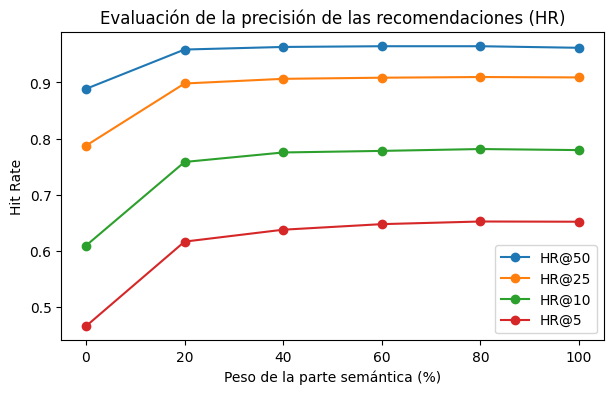

In [15]:
# Gráfica de HR para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["HR"], "o-", label="HR@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Hit Rate")
ax.set_title("Evaluación de la precisión de las recomendaciones (HR)")
ax.legend()
plt.show()

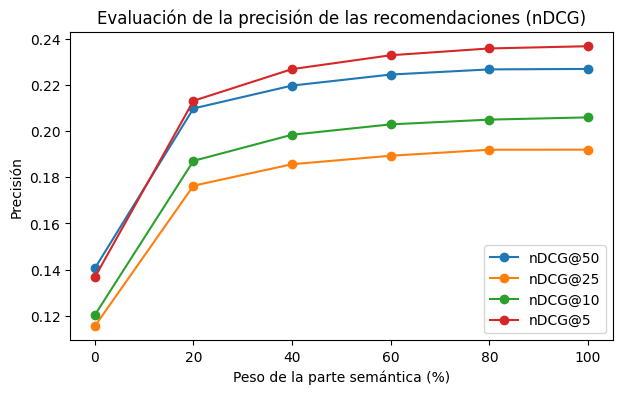

In [16]:
# Gráfica de nDCG para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["nDCG"], "o-", label="nDCG@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (nDCG)")
ax.legend()
plt.show()

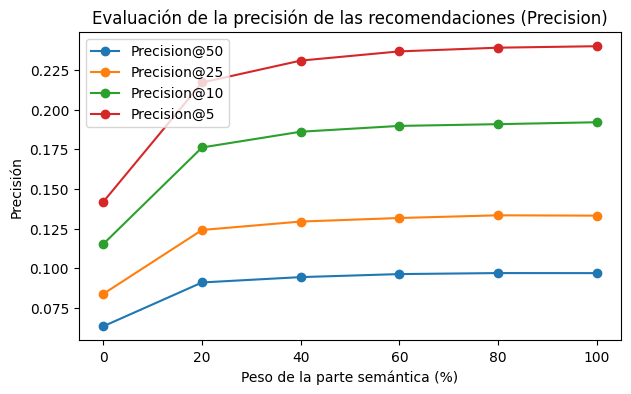

In [17]:
# Gráfica de Precision para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["Precision"], "o-", label="Precision@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (Precision)")
ax.legend()
plt.show()

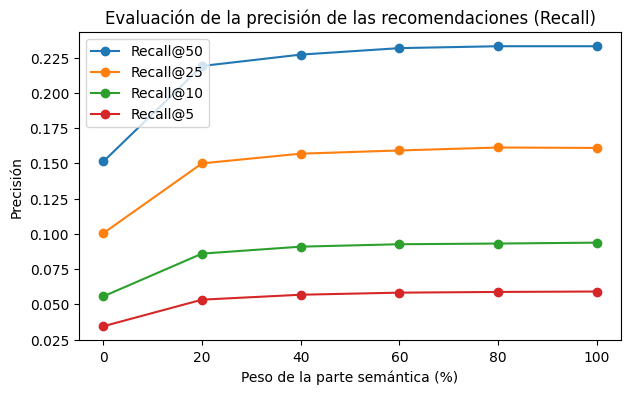

In [18]:
# Gráfica de Recall para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["Recall"], "o-", label="Recall@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (Recall)")
ax.legend()
plt.show()

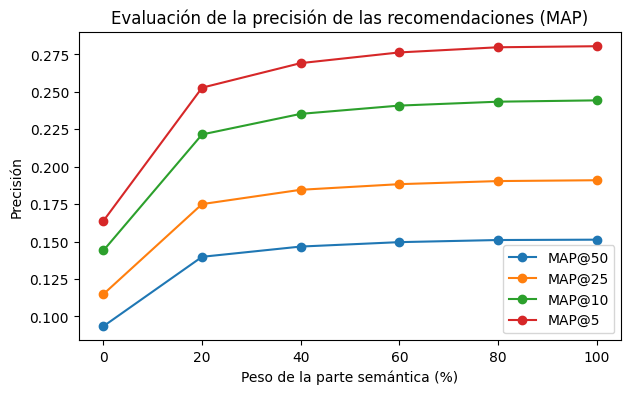

In [19]:
# Gráfica de MAP para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["MAP"], "o-", label="MAP@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (MAP)")
ax.legend()
plt.show()

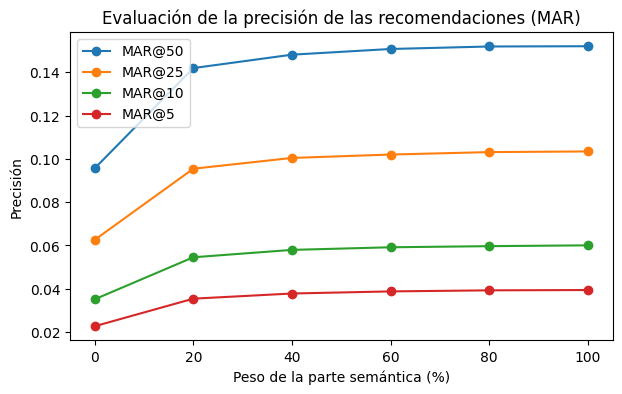

In [20]:
# Gráfica de MAR para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["MAR"], "o-", label="MAR@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (MAR)")
ax.legend()
plt.show()

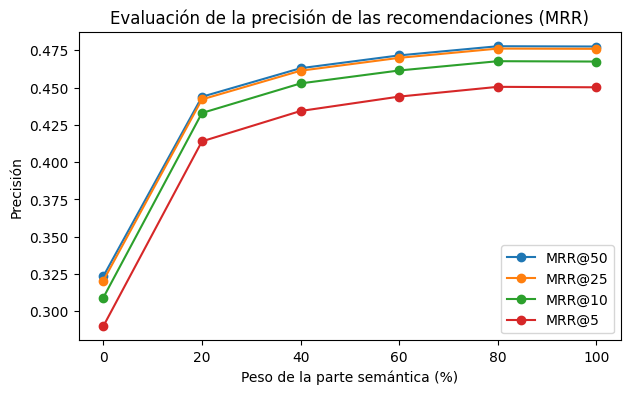

In [21]:
# Gráfica de MRR para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["MRR"], "o-", label="MRR@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (MRR)")
ax.legend()
plt.show()

<span style="color:red">Pendiente de analizar.</span>

#### Cobertura

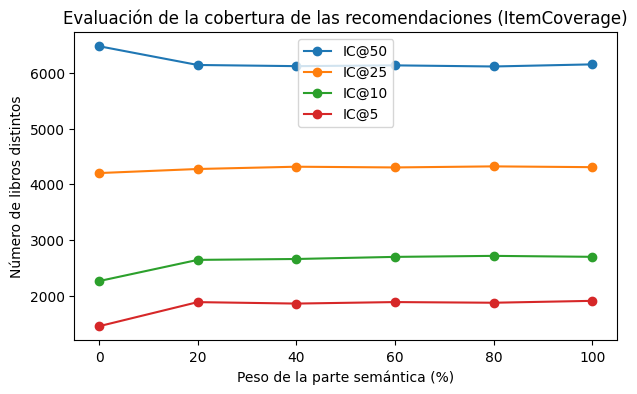

In [22]:
# Gráfica de ItemCoverage para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["ItemCoverage"], "o-", label="IC@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Número de libros distintos")
ax.set_title("Evaluación de la cobertura de las recomendaciones (ItemCoverage)")
ax.legend()
plt.show()

#### Novedad

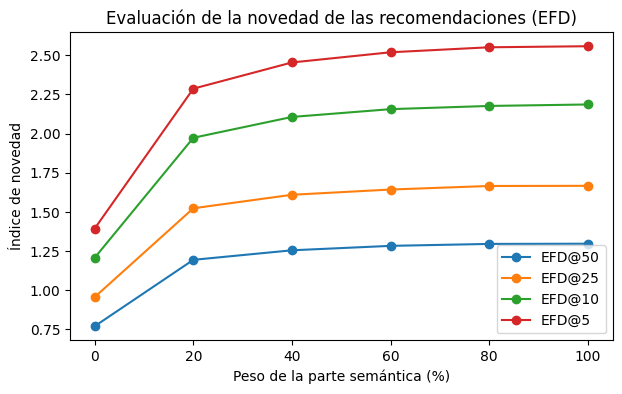

In [23]:
# Gráfica de EFD para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["EFD"], "o-", label="EFD@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Índice de novedad")
ax.set_title("Evaluación de la novedad de las recomendaciones (EFD)")
ax.legend()
plt.show()

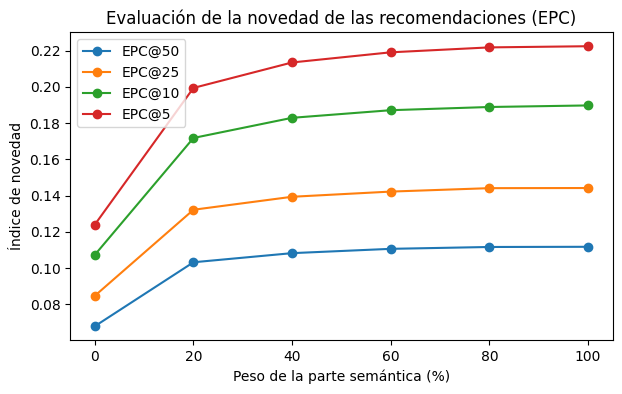

In [24]:
# Gráfica de EPC para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["EPC"], "o-", label="EPC@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Índice de novedad")
ax.set_title("Evaluación de la novedad de las recomendaciones (EPC)")
ax.legend()
plt.show()

#### Diversidad

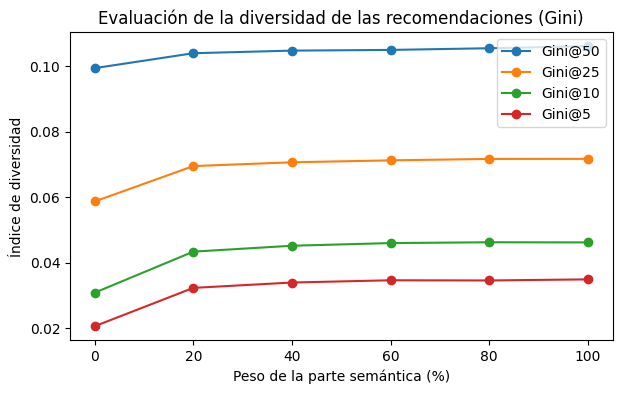

In [25]:
# Gráfica de Gini para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["Gini"], "o-", label="Gini@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Índice de diversidad")
ax.set_title("Evaluación de la diversidad de las recomendaciones (Gini)")
ax.legend()
plt.show()

Una vez queda claro que los mejores resultados se obtienen con el segundo modelo cuando el peso a la parte semántica es total, comparamos los resultados que se obtendrían para distintos valores de $N$ usuarios más próximos. Se evalúa el modelo para $N \in \{7, 11, 15, 19, 23, 27, 31, 35, 39, 43, 47, 51, 55\}$.

In [30]:
# Ruta de resultados de evaluación de recomendaciones del modelo KNN
rec_eval_knn_path = eval_knn_path + "/user-user/"

# Pesos dados a la parte semántica
num_users = [7, 11, 15, 19, 23, 27, 31, 35, 39, 43, 47, 51, 55]

# Cutoffs
cutoffs = [50, 25, 10, 5]

# Leer los ficheros de resultados y juntar en un único dataframe (por cada cutoff)
eval_df_dict = {}
for cutoff in cutoffs:
    eval_df = pd.DataFrame()
    for n in num_users:
        df = pd.read_csv(rec_eval_knn_path + "cutoff_" + str(cutoff) + "_k_" + str(n) + ".tsv", sep="\t")
        eval_df = pd.concat([eval_df, df], ignore_index=True)
    eval_df["model"] = num_users
    eval_df.rename(columns={"model": "num_users"}, inplace=True)
    eval_df_dict[cutoff] = eval_df.copy()

# Cada uno de los dataframes con los resultados de evaluación para un cutoff
for cutoff in eval_df_dict:
    print("Cutoff:", cutoff)
    display(eval_df_dict[cutoff])

Cutoff: 50


,num_users,nDCG,Precision,Recall,HR,MAP,MAR,MRR,ItemCoverage,EFD,EPC,Gini
0,7,0.201229,0.086383,0.207968,0.954195,0.133972,0.135141,0.437979,8124.0,1.169067,0.099903,0.162686
1,11,0.217997,0.093283,0.224386,0.961896,0.145483,0.146608,0.464628,7043.0,1.254641,0.107721,0.126931
2,15,0.226860,0.096968,0.233073,0.961596,0.151263,0.152046,0.477562,6154.0,1.296943,0.111733,0.106042
3,19,0.231238,0.098878,0.237617,0.964396,0.154303,0.155268,0.482727,5573.0,1.316405,0.113658,0.093812
4,23,0.234371,0.100072,0.240360,0.963896,0.156302,0.157167,0.489307,5091.0,1.329235,0.114988,0.085045
5,27,0.236861,0.101308,0.243504,0.964496,0.157513,0.158409,0.491546,4732.0,1.338753,0.115996,0.078366
6,31,0.237539,0.101632,0.244417,0.963296,0.157924,0.158862,0.492078,4460.0,1.338836,0.116162,0.073594
7,35,0.238194,0.102090,0.245386,0.964596,0.158252,0.159244,0.492025,4230.0,1.339969,0.116395,0.069646
8,39,0.238175,0.101978,0.245185,0.964496,0.158595,0.159534,0.491856,4025.0,1.337260,0.116295,0.066385
9,43,0.238238,0.102104,0.245435,0.964996,0.158547,0.159432,0.491953,3846.0,1.334948,0.116222,0.063672


Cutoff: 25


,num_users,nDCG,Precision,Recall,HR,MAP,MAR,MRR,ItemCoverage,EFD,EPC,Gini
0,7,0.169541,0.117892,0.142676,0.890989,0.169120,0.091930,0.436119,6253.0,1.500561,0.128663,0.116096
1,11,0.184131,0.127773,0.154539,0.902790,0.183377,0.099411,0.462865,5028.0,1.609680,0.138776,0.085896
2,15,0.191937,0.133205,0.160924,0.908891,0.190975,0.103444,0.476005,4307.0,1.666624,0.144156,0.071650
3,19,0.195987,0.136166,0.164626,0.911291,0.194615,0.105456,0.481170,3844.0,1.692655,0.146719,0.062826
4,23,0.198637,0.137706,0.166562,0.912691,0.197120,0.106608,0.487798,3511.0,1.707403,0.148314,0.056629
5,27,0.200036,0.138358,0.167228,0.912191,0.198606,0.107227,0.490006,3235.0,1.712160,0.148965,0.051941
6,31,0.200570,0.138742,0.167752,0.913691,0.199086,0.107494,0.490604,3015.0,1.710499,0.149072,0.048231
7,35,0.201135,0.139342,0.168489,0.912691,0.199425,0.107631,0.490481,2860.0,1.711361,0.149309,0.045513
8,39,0.201073,0.139278,0.168193,0.913091,0.199890,0.107900,0.490327,2699.0,1.708261,0.149204,0.043146
9,43,0.201245,0.139638,0.168534,0.914591,0.199828,0.107846,0.490471,2563.0,1.705591,0.149159,0.041124


Cutoff: 10


,num_users,nDCG,Precision,Recall,HR,MAP,MAR,MRR,ItemCoverage,EFD,EPC,Gini
0,7,0.181785,0.170857,0.083505,0.758476,0.215696,0.053265,0.427537,3956.0,1.977958,0.170087,0.075259
1,11,0.197383,0.184418,0.089961,0.775178,0.234512,0.057655,0.454494,3135.0,2.116606,0.182942,0.055988
2,15,0.205905,0.192059,0.093752,0.779578,0.244336,0.060073,0.467477,2696.0,2.186229,0.189722,0.046145
3,19,0.209789,0.195410,0.095293,0.786879,0.249053,0.061209,0.473095,2396.0,2.214251,0.192532,0.040115
4,23,0.212708,0.197340,0.096194,0.787279,0.252724,0.061821,0.479557,2154.0,2.233740,0.194569,0.035774
5,27,0.214539,0.198470,0.096744,0.789879,0.255225,0.062417,0.481940,1975.0,2.241078,0.195540,0.032635
6,31,0.215050,0.198950,0.097040,0.787479,0.255721,0.062535,0.482297,1835.0,2.237804,0.195544,0.030076
7,35,0.214900,0.198730,0.096808,0.786579,0.256207,0.062651,0.482163,1728.0,2.230664,0.195183,0.028135
8,39,0.215481,0.199630,0.097234,0.791279,0.256467,0.062738,0.482365,1648.0,2.230795,0.195433,0.026604
9,43,0.215454,0.199720,0.097251,0.788479,0.256377,0.062708,0.482194,1562.0,2.224275,0.195101,0.025264


Cutoff: 5


,num_users,nDCG,Precision,Recall,HR,MAP,MAR,MRR,ItemCoverage,EFD,EPC,Gini
0,7,0.207557,0.211821,0.052217,0.611861,0.246273,0.034752,0.407847,2794.0,2.307559,0.198729,0.057292
1,11,0.226422,0.229923,0.056511,0.638564,0.268559,0.037697,0.436010,2226.0,2.473696,0.214191,0.042108
2,15,0.236679,0.239984,0.059088,0.652165,0.280510,0.039433,0.450205,1905.0,2.558240,0.222388,0.034859
3,19,0.241509,0.244924,0.060253,0.659666,0.285637,0.040136,0.455912,1655.0,2.593017,0.225836,0.029631
4,23,0.245461,0.247525,0.060860,0.660566,0.291282,0.040809,0.462525,1510.0,2.617852,0.228497,0.026482
5,27,0.247837,0.249865,0.061460,0.658566,0.294284,0.041296,0.464183,1394.0,2.632551,0.230057,0.024158
6,31,0.248567,0.250565,0.061633,0.659166,0.295113,0.041350,0.465012,1296.0,2.630137,0.230187,0.022210
7,35,0.249768,0.252825,0.062237,0.662566,0.295480,0.041514,0.465513,1231.0,2.636067,0.230959,0.020873
8,39,0.249177,0.251765,0.061947,0.659266,0.295618,0.041521,0.464700,1175.0,2.622968,0.230054,0.019502
9,43,0.249206,0.252085,0.062012,0.661166,0.295433,0.041465,0.465160,1117.0,2.615403,0.229645,0.018418


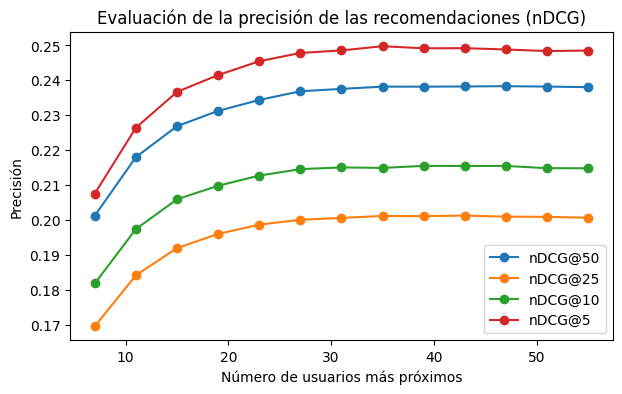

In [31]:
# Gráfica de nDCG para cada cutoff en función del número de usuarios más próximos
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["num_users"], eval_df["nDCG"], "o-", label="nDCG@" + str(cutoff))
ax.set_xlabel("Número de usuarios más próximos")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (nDCG)")
ax.legend()
plt.show()